In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

cm2 = ListedColormap(['C1', 'C2'])
cm3 = ListedColormap(['C1', 'C2', 'C3'])

## 스케일 효과

- 아래 데이터는 $x$축으로 거의 변하지 않고 $y$축으로 많이 변하는 데이터

- 이 두 특성의 변화 정도를 비슷하게 맞춰서 알고리즘이 안정적으로 동작하게 하여야 함

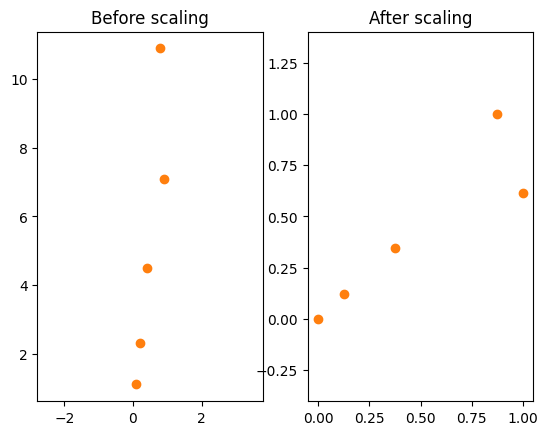

In [2]:
X_train = np.array([[0.1, 0.8, 0.4, 0.2, 0.9], [1.1, 10.9, 4.5, 2.3, 7.1]]).T
y_train = np.array([0.2, 0.3, 0.5, 0.7, 0.9])
fig, ax = plt.subplots(nrows=1, ncols=2, dpi=100)

ax[0].plot(X_train[:,0], X_train[:,1], 'o', color='C1')
ax[0].axis('equal')
ax[0].set_title('Before scaling')

###############################################
# 스케일러 transform[+]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

ax[1].plot(X_train_scaled[:,0], X_train_scaled[:,1], 'o', color='C1')
ax[1].axis('equal')
ax[1].set_title('After scaling')
###############################################

plt.show()

- 위 2차원 데이터를 입력으로 하고 각 포인트에 `y_train = np.array([0.2, 0.3, 0.5, 0.7, 0.9]) `라는 타겟이 붙어 있는 2차원 선형회귀를 한다고 가정하고 손실함수를 그려보면 스케일링 효과를 확실하게 시각화 시킬 수 있음

- 먼저 다변수(다중) 선형회귀의 손실 함수를 정의한다.

In [3]:
# 아래부분 이해하고 넘어가자

def L(w, X, y):
    # w: (grid_size, 2)
    # X: (N, 2)
    # y: (N,)

    targets = y.reshape(-1,1) # (N,1)
    #                        (N,2)*(2,grid_size)
    #                        (N,grid_size)   - (N,1) = (N,grid_size)
    # (N,grid_size) -- mean, axis=0 --- (grid_size,)
    L_grid = 0.5 * np.mean( ((np.dot(X, w.T) - targets))**2, axis=0)

    return L_grid

In [4]:
w0 = np.linspace(-50,50,150)
w1 = np.linspace(-50,50,150)
W0, W1 = np.meshgrid(w0, w1)

w_grid = np.c_[W0.ravel(), W1.ravel()]
L_grid = L(w_grid, X_train, y_train).reshape(W0.shape)
L_grid_scaled = L(w_grid, X_train_scaled, y_train).reshape(W0.shape)

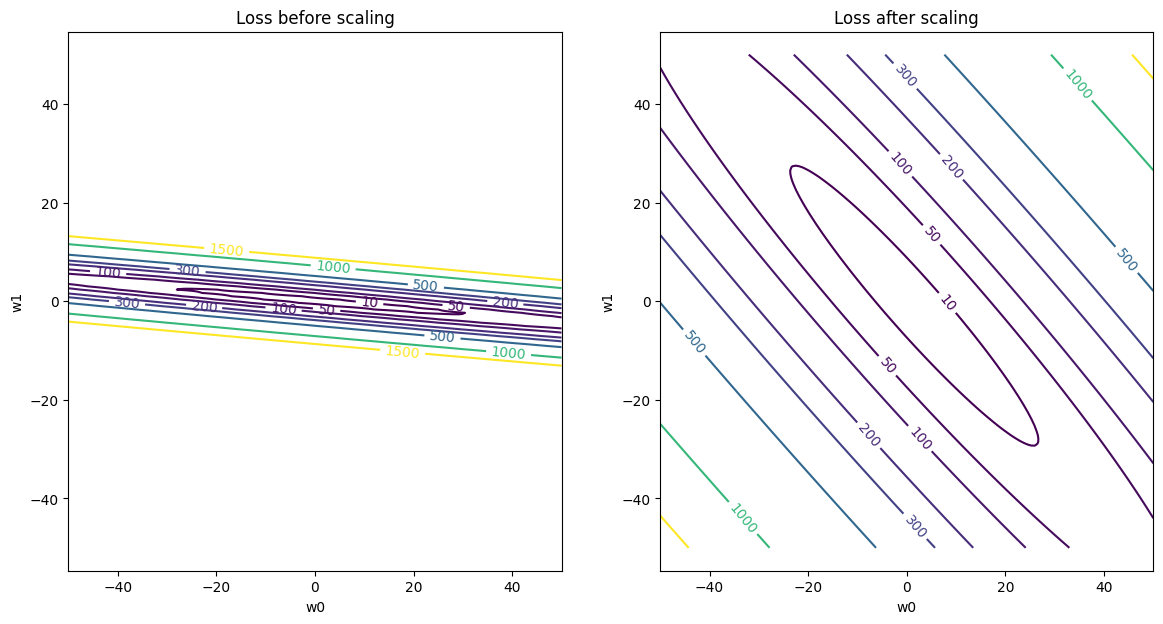

In [5]:
fig, ax = plt.subplots(figsize=(14,7), nrows=1, ncols=2)

contours = ax[0].contour(W0, W1, L_grid,  levels=[10, 50, 100, 200, 300, 500, 1000, 1500])
ax[0].clabel(contours, contours.levels, fmt="%d", fontsize=10)
ax[0].set_xlabel('w0')
ax[0].set_ylabel('w1')
ax[0].set_title('Loss before scaling')
ax[0].axis('equal')

contours = ax[1].contour(W0, W1, L_grid_scaled,  levels=[10, 50, 100, 200, 300, 500, 1000, 1500])
ax[1].clabel(contours, contours.levels, fmt="%d", fontsize=10)
ax[1].set_xlabel('w0')
ax[1].set_ylabel('w1')
ax[1].set_title('Loss after scaling')
ax[1].axis('equal')

plt.show()

- 스케일링 전 손실함수는 극도로 찌그러져있는 모습을 볼 수 있음

- 스케일링 후 이런 현상이 거의 완화되어 제일 낮은 점을 찾기 용이한 형태로 바뀌었음

- 대표적인 스케일 기법은 `MinMaxScaler`, `StandardScaler`가 있음

- `MinMaxScaler`

  - 데이터셋의 최대값과 최소값의 범위로 정규화

$$
x \gets \frac{x-x_{\text{min}}}{x_{\text{max}}-x_{\text{min}}}
$$

```python
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
```

- `StandardScaler`
  - 데이터의 평균과 표준편차로 정규화
$$
x \gets \frac{x - \bar{x}}{\sigma}
$$

```python
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
```

### [실습]

- 다음 유방암 데이터셋에 KNN 모델을 사용하여 스케일링 효과를 확인

- 스케일링 하지 않은 데이터에 대해 학습하고 `MinMaxScaler`와 `StandardScaler`로 스케일링한 데이터에 대해서 각각 학습하여 학습 결과를 비교

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=20)


In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# 스케일 하지 않고 학습, n_neighbors = 2 [+]
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(X_train, y_train)
print("학습 세트 정확도: {:.2f}".format(clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

학습 세트 정확도: 0.98
테스트 세트 정확도: 0.88


### StandardScaler

In [10]:
# 스케일링[+]
std_scaler =  StandardScaler()# 스케일러 생성
# 스케일러 피팅/데이터 변환
X_train_scaled =  std_scaler.fit_transform(X_train)

# 학습, n_neighbors = 2 [+]
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(X_train_scaled, y_train)

# 성능 확인[+]
print("학습 세트 정확도: {:.2f}".format(clf.score(X_train_scaled, y_train)))

# 테스트 데이터에 대한 성능확인, 여기서 그냥 X_test에 대한 성능을 먼저 보이기[*]
X_test_scaled = std_scaler.transform(X_test)
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test_scaled, y_test)))


학습 세트 정확도: 0.98
테스트 세트 정확도: 0.91


### MinMaxScaler

- 이상치에 취약함

In [11]:
# 스케일링[*]
minmax_scaler = MinMaxScaler() # 스케일러 생성

minmax_scaler.fit(X_train) # 스케일러 피팅
X_train_scaled = minmax_scaler.transform(X_train) # 스케일러를 이용한 데이터 변환

# 학습, n_neighbors = 2 [*]
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(X_train_scaled, y_train)

# 성능 확인[*]
print("학습 세트 정확도: {:.2f}".format(clf.score(X_train_scaled, y_train)))
X_test_scaled = minmax_scaler.transform(X_test)
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test_scaled, y_test)))

학습 세트 정확도: 0.97
테스트 세트 정확도: 0.91


### **주의**

- 테스트 셋에 대한 스케일러는 항상 학습 셋에서 사용한 동일한 스케일러를 사용해야 함

- 아래는 학습과 테스트 세트를 따로 스케일링하는 것을 그림으로 나타냄

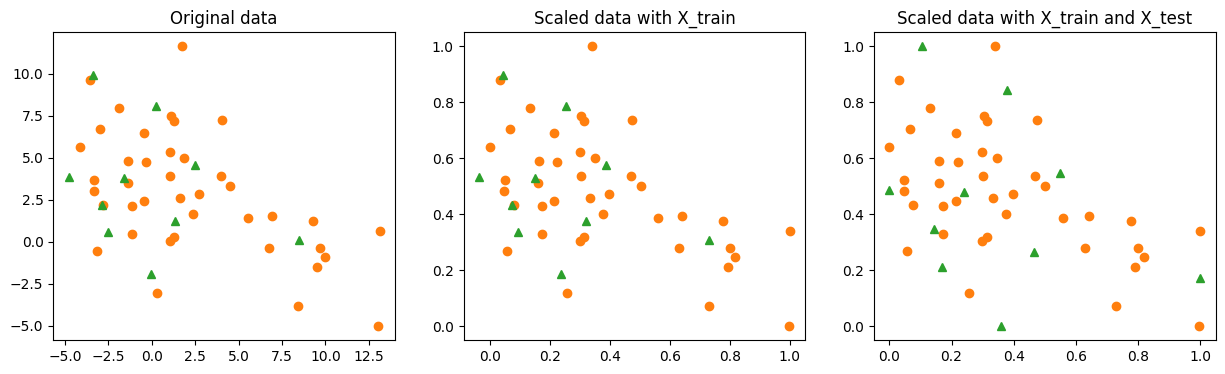

In [12]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=5, random_state=0, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2)

fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=3)

ax[0].plot(X_train[:,0], X_train[:,1], 'o', color='C1')
ax[0].plot(X_test[:,0], X_test[:,1], '^', color='C2')
ax[0].set_title('Original data')

############################
# 학습세트에 대해서 만들어진 스케일러를 동일하게 사용[+]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

############################
ax[1].plot(X_train_scaled[:,0], X_train_scaled[:,1], 'o', color='C1')
ax[1].plot(X_test_scaled[:,0], X_test_scaled[:,1], '^', color='C2')
ax[1].set_title('Scaled data with X_train')

############################
# 테스트 세트에 대해서 따로 스케일러를 또 사용[+]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

scaler_test = MinMaxScaler()
X_test_scaled = scaler_test.fit_transform(X_test)

############################
ax[2].plot(X_train_scaled[:,0], X_train_scaled[:,1], 'o', color='C1')
ax[2].plot(X_test_scaled[:,0], X_test_scaled[:,1], '^', color='C2')
ax[2].set_title('Scaled data with X_train and X_test')

plt.show()

- 즉 fit의 경우 train셋에만 적용.
- text셋의 경우에는 fit된 스케일러에 transform만 적용